In [1]:
import numpy as np
import PIL
from keras.models import load_model
from model import textTodlatentsModel
from bert_serving.client import BertClient
import dnnlib
import pickle
import dnnlib.tflib as tflib
from textwrap import wrap
from encoder.generator_model import Generator
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

Using TensorFlow backend.


In [2]:
tflib.init_tf()
with open('./model/stylegan.pkl', 'rb') as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

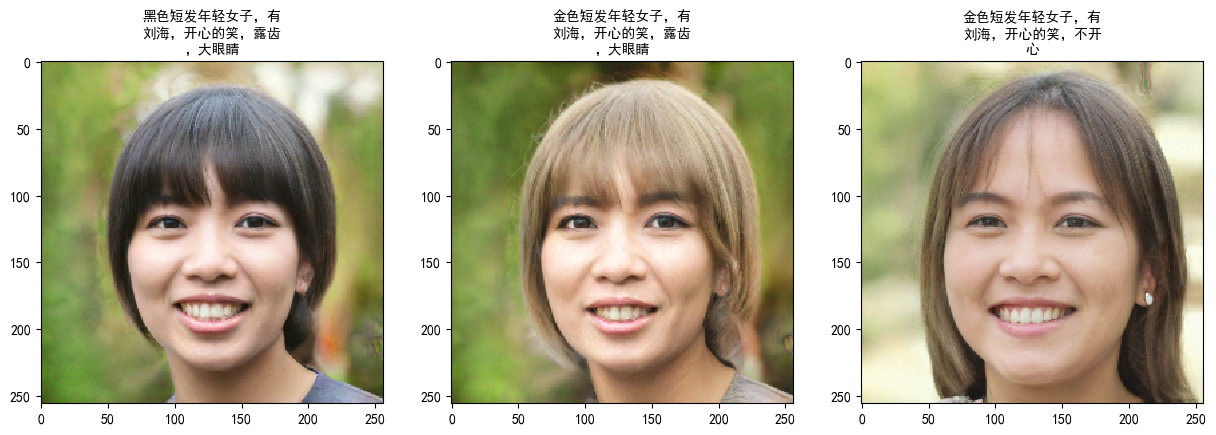

In [5]:
def predict(inputText):
    sentenceEmbedding = np.zeros(shape = [1, 768], dtype = np.float)
    bc = BertClient()
    sentenceEmbedding = bc.encode([inputText])
    model = load_model("./model/textEmbeddingDlatents.h5")
    sentenceEmbedding = np.expand_dims(sentenceEmbedding, 0)
    result = model.predict(sentenceEmbedding)
    return result
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))
text1 = "黑色短发年轻女子，有刘海，开心的笑，露齿，大眼睛"
text2 = "金色短发年轻女子，有刘海，开心的笑，露齿，大眼睛"
text3 = "金色短发年轻女子，有刘海，开心的笑，"
result1 = predict(text1)
image1 = generate_image(result1)
result2 = predict(text2)
image2 = generate_image(result2)
result3 = predict(text3)
image3 = generate_image(result3)
plt.figure(figsize=(15,15), dpi=100)
plt.subplot(1, 3, 1)
plt.title("\n".join(wrap(text1, 10)), fontsize=10)
plt.imshow(image1)
plt.subplot(1, 3, 2)
plt.title("\n".join(wrap(text2, 10)), fontsize=10)
plt.imshow(image2)
plt.subplot(1, 3, 3)
plt.title("\n".join(wrap(text3, 10)), fontsize=10)
plt.imshow(image3)
plt.save('example.png')
plt.show()